In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Model ve Tahmin

In [4]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [5]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

## Model Tuning

In [6]:
gbm = GradientBoostingClassifier()

In [7]:
gbm_params = {"learning_rate":[0.1,0.01,0.001,0.05],
              "n_estimators": [100, 300, 500, 1000],
              "max_depth": [2,3,5,8]}

In [8]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [9]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500}

In [10]:
# final model

In [11]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.1, max_depth=8,n_estimators=500).fit(X_train, y_train)

In [12]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7056277056277056

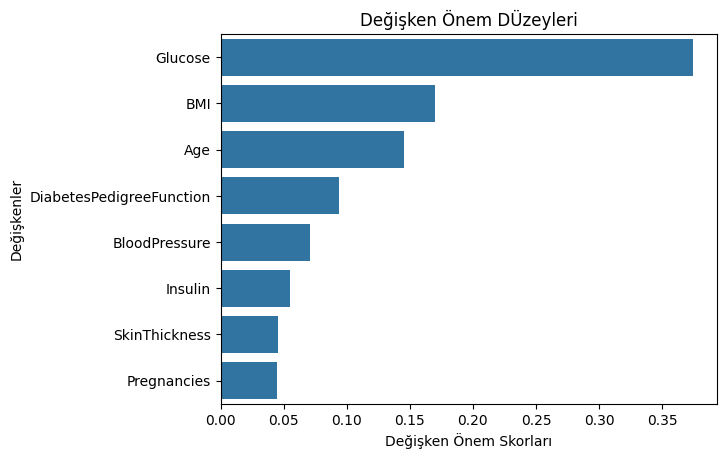

[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=500; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   2.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   1.3s
[CV] END ..learning_rate=0.1, max_depth=3, n_estimators=1000; total time=   2.6s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   2.5s
[CV] END ..learning_rate=0.1, max_depth=5, n_estimators=1000; total time=   4.9s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=   1.2s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=300; total time=   3.7s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.2s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.0

[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.6s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   2.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   1.3s
[CV] END ..learning_rate=0.1, max_depth=3, n_estimators=1000; total time=   2.7s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   1.5s
[CV] END ..learning_rate=0.1, max_depth=5, n_estimators=1000; total time=   5.0s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=300; total time=   3.8s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.5s
[CV] END ..learning_rate=0.1

[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=500; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   1.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   1.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   2.5s
[CV] END ..learning_rate=0.1

[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=500; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   1.4s
[CV] END ..learning_rate=0.1, max_depth=3, n_estimators=1000; total time=   2.6s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   1.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   2.6s
[CV] END ..learning_rate=0.1

[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=500; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   1.3s
[CV] END ..learning_rate=0.1, max_depth=3, n_estimators=1000; total time=   2.6s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   1.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   2.5s
[CV] END ..learning_rate=0.1

In [13]:
# degisken onem duzeyleri

feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem DÜzeyleri")
plt.show()